# Solutions to Sample Coding Questions

## Solution to Sample Question 1

**Part 1. (10 points)** Predict the output of the following code, which is similar to the RM2 policy in Lab 2.

In [3]:
import numpy as np
data=np.array([100,70,50,30,200])
order=np.array([4,0,1,2,3])
price=60
left=3
tot=0
for element in data[order.argsort()]:
    if element>=price:
        tot+=price
        left-=1
    if left==2:
        price=100
    elif left==1:
        price=150
    elif left==0:
        break
print(tot)

160


To understand what's going on, you can print each step of the above code to have the computer help you take baby steps to work out everything line by line. Also you can watch last part of the video on the review session on 2/22 for a walk-through.

Note that the first `if` statement, `if element>=price`, along with the next two indented lines, is one block. The next group of `if left==2` followed by two `elif` statements are one block. The two blocks are executed one after another, with no relationship in between. On the other hand, the first `elif` statement is only checked if the first `if left==2` statement does not hold. The second `elif` is checked only if the `if` and the first `elif` does not hold. `elif` stands for "else if".

**Part 2. (15 points)**

**Completed Solution:**


In [ ]:
from scipy.stats import bernoulli,poisson
import numpy as np

def generateScenario():
    x=bernoulli(p=0.3).rvs()
    if x==1:
        return poisson(mu=100).rvs(size=8)
    else:
        return poisson(mu=45).rvs(size=8)
    
def simulateScenario(data,inventory):
    i=0
    for demand in data:
        inventory-=demand
        if inventory<=0:
            break
        i+=1
    return i

inventory=400
dataset=[generateScenario() for i in range(1000)]
values=[simulateScenario(data,inventory) for data in dataset]
import matplotlib.pyplot as plt
plt.hist(values,bins=range(10),density=True)
plt.title('Distribution of weeks before tickets sell out')
plt.ylabel('Probability')
plt.xlabel('Week in which ticket sells out')
plt.show()

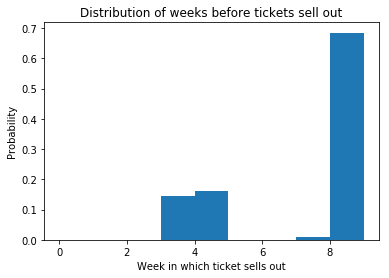

In [59]:
# Expected output when complete.

## Solution to Sample Question 2

**Part 1. (10 points)** Predict the output of the following code 

In [4]:
import numpy as np

def f(x):
    x[1:]=x[:-1]
    x[0]=0
    s=np.sum(x)
    x[0]=max(0,15-s)
    return x

print(f(np.array([3,8,2]))[0])

4


**Part 2. (15 points)** 


In [5]:
import numpy as np

def simulate(data,beds,stay):
    pipeline=np.zeros(stay,dtype=int)
    totRejected=0
    day=1
    for demand in data:
        
        # BEGIN
        pipeline[1:]=pipeline[:-1]
        pipeline[0]=0
        occupied=sum(pipeline)
        openBeds=max(0,beds-occupied)
        admitted=min(openBeds,demand)
        pipeline[0]=admitted
        # End
        
        rejected=demand-admitted
        print('On day {0}, {1} incoming patient(s) is rejected.'.format(day,rejected))
        totRejected+=rejected
        day+=1
    return totRejected

data=[6,10,3,8,4,6]
stay=3              
beds=15
ans=simulate(data,beds,stay)        
print('Total number of rejected patients is', ans)
        

On day 1, 0 incoming patient(s) is rejected.
On day 2, 1 incoming patient(s) is rejected.
On day 3, 3 incoming patient(s) is rejected.
On day 4, 2 incoming patient(s) is rejected.
On day 5, 0 incoming patient(s) is rejected.
On day 6, 1 incoming patient(s) is rejected.
Total number of rejected patients is 7


## Solution to Sample Question 3

**Part 1: (10 points)** 
Predict the output of the following code.


In [6]:
def f(x):
    return 3*x

x=np.array([3,6,2,10])
y=np.array([5,4,2,9])
a=np.sum(x-y)
b=np.sum(x>y)
c=np.sum(x<y)
d=len(x)
e=np.sum(np.maximum(x-y,0))
l=[f(x) for x in [a,b,c,d,e]]
print(l)

[3, 6, 3, 12, 9]


**Part 2: (15 points)**


In [1]:
import numpy as np

def simulateScenario(profitA,profitB):
    
    # BEGIN
    numDays=len(profitA)
    numBigger=np.sum(profitA>profitB)     # a) Compute number of days A is bigger
    avgDiff=np.average(profitA-profitB) # b) compute difference in mean
    diff=profitA-profitB                 # c) compute average gain conditional on A is bigger
    if numBigger==0:
        avgGain=np.nan
    else:
        avgGain=np.sum(np.maximum(diff,0))/numBigger
    stdDiff=np.std(diff)
    prob=numBigger/numDays
    # END
    
    return prob,avgDiff,stdDiff,avgGain

profitA=np.array([10,5,8,4,6])
profitB=np.array([11,8,3,7,6])
prob,avgDiff,stdDiff,avgGainCondBigger=simulateScenario(profitA,profitB)

print('The profit for A is strictly larger than B with probability {0:.0%}'.format(prob))
print('The expected profit for A minus the expected profit for B is',avgDiff)
print('The standard deviation in the difference in expected profit is {0:.2f}'.format(stdDiff))
print('On days when profit for A is larger, it is larger on average by',avgGainCondBigger)


The profit for A is strictly larger than B with probability 20%
The expected profit for A minus the expected profit for B is -0.4
The standard deviation in the difference in expected profit is 2.94
On days when profit for A is larger, it is larger on average by 5.0
